# Assignment 1

By Anastasia Baylis

# 1. Discord server username
![alt text](download.png)
# 2. ENV environment screen shot & code
![alt text](download-2.png)

# Pytorch test

In [14]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print(torch.cuda.current_device())
    print(torch.cuda.device_count())
    print(torch.cuda.get_device_name(0))

device

0
1
NVIDIA GeForce RTX 4070 Ti SUPER


device(type='cuda', index=0)

# Eigenvalue Analysis

## Step 1: Compute Eigenvalues

for each of the following covariance matricies:
* reference covariance Σ0
* the  empirical covariance from the low-rank modification S-low-rank
* the empirical covariance from the diffuse modification S-diffuse
* compute all eigenvalues and sort them in decreasing order.

In [15]:
import numpy as np

def sorted_eigenvalues(x):
    x = 0.5 * (x + x.T)  # symmetric matrix
    w = np.linalg.eigh(x)[0] # compute eigenvalues
    return w[::-1] # sort in descending order

# get sigma
def empirical_covariance(data):
    n_samples = data.shape[0]
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    covariance_matrix = (centered_data.T @ centered_data) / (n_samples - 1)
    return covariance_matrix

# Generate data
n_samples = 1000
n_features = 500
data = np.random.randn(n_samples, n_features)

# sigma computation
sigma = empirical_covariance(data)

# Low-rank approximation
U, S, Vt = np.linalg.svd(sigma)
rank = 50
S_low_rank = np.dot(U[:, :rank], np.dot(np.diag(S[:rank]), Vt[:rank, :]))

# High-rank approximation
rank_high = 200
S_diffuse= np.dot(U[:, :rank_high], np.dot(np.diag(S[:rank_high]), Vt[:rank_high, :]))

# Compute and print sorted eigenvalues
eigenval_sigma=sorted_eigenvalues(sigma)
eigenval_S_low_rank=sorted_eigenvalues(S_low_rank)
eigenval_S_diffuse=sorted_eigenvalues(S_diffuse)

print("Eigenvalues of sigma:") # Print first 10 eigenvalues in order
print (", ".join(f"{x:.8f}" for x in eigenval_sigma[:10]))
print("Eigenvalues of S_low_rank:")
print(", ".join(f"{x:.8f}" for x in eigenval_S_low_rank[:10]))
print("Eigenvalues of S_high_rank:")
print(", ".join(f"{x:.8f}" for x in eigenval_S_diffuse[:10]))

Eigenvalues of sigma:
2.87774036, 2.84306002, 2.82946396, 2.76176619, 2.75144320, 2.70736216, 2.68432698, 2.66627720, 2.65141206, 2.64316562
Eigenvalues of S_low_rank:
2.87774036, 2.84306002, 2.82946396, 2.76176619, 2.75144320, 2.70736216, 2.68432698, 2.66627720, 2.65141206, 2.64316562
Eigenvalues of S_high_rank:
2.87774036, 2.84306002, 2.82946396, 2.76176619, 2.75144320, 2.70736216, 2.68432698, 2.66627720, 2.65141206, 2.64316562


## Step 2: Visualize the spectra

Create a single plot that shows:
* the eigenvalues of Σ0
* the eigenvalues of S-low-rank
* the eigenvalues of S-diffuse

on the same axes.

Use a logarithmic scale on the vertical axis.

This plot should allow you to visually compare:
* how many eigenvalues are significantly larger than the noise floor,
* and how the different modifications affect the spectrum.

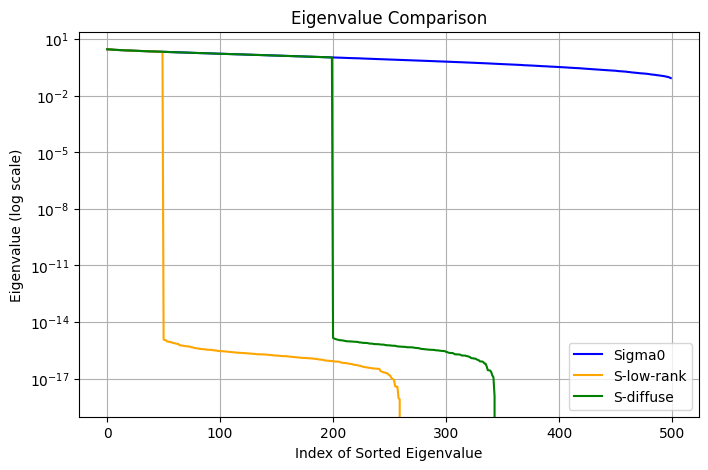

In [16]:
import matplotlib.pyplot as plt

# create plot
plt.figure(figsize=(8, 5))

# plot values
plt.plot(eigenval_sigma, label='Sigma0', color='blue')
plt.plot(eigenval_S_low_rank, label='S-low-rank', color='orange')
plt.plot(eigenval_S_diffuse, label='S-diffuse', color='green')

# vertical axis
plt.yscale('log')

# labels for plot
plt.xlabel('Index of Sorted Eigenvalue')
plt.ylabel('Eigenvalue (log scale)')
plt.title('Eigenvalue Comparison')

# legend, grid, & display
plt.legend()
plt.grid(True)
plt.show()

## Step 3: Quantify "significant change"

Define an eigenvalue as significantly changed if it differs from the corresponding eigenvalue of Σ0 by more than a fixed threshold (e.g., 10% relative difference).

Using this criterion:

* Count how many eigenvalues change significantly in the low-rank case.
* Count how many eigenvalues change significantly in the diffuse case.

Report these numbers explicitly.


In [17]:
def count_sig_changes(eigenval_ref, eigenval_mod, threshold=1e-5, epsilon=1e-12):
   eigenval_ref = np.asarray(eigenval_ref)
   eigenval_mod = np.asarray(eigenval_mod)
   
   mask = np.abs(eigenval_ref) > epsilon
   rel_difference = np.zeros_like(eigenval_ref, dtype=float)
   rel_difference[mask] = np.abs(eigenval_mod[mask] - eigenval_ref[mask]) / np.abs(eigenval_ref[mask])

   significant = mask & (rel_difference > threshold)
   return int(np.sum(significant)), significant, rel_difference

count_low, sig_changes_low, rel_diff_low = count_sig_changes(eigenval_sigma, eigenval_S_low_rank, threshold=.10)
count_diff, sig_changes_high, rel_diff_high = count_sig_changes(eigenval_sigma, eigenval_S_diffuse, threshold=.10)

print("significantly changed eigenvalues in low-rank case: ", count_low)
print("significantly changed eigenvalues in diffuse case: ", count_diff)

significantly changed eigenvalues in low-rank case:  450
significantly changed eigenvalues in diffuse case:  300


## Step 4: Interpret the results 
Answer the following questions in complete sentences:

1. In the low-rank case, how many eigenvalues change substantially, and how does this number relate to the rank of the coefficient modification?


2. In the diffuse case, why are many eigenvalues affected, even though the overall magnitude of the change is the same?


3. How do these observations illustrate the idea that matrix rank limits the number of variance directions that can change?


Your explanation should explicitly reference:
eigenvalues,
rank,
and geometric directions of variance.

#### My Answer:
context:
* There are 500 eigenvalues total.
* Significantly changed eigenvalues in low-rank case: 450
* Significantly changed eignevalues in diffuse case: 300
        

1. In the low-rank case, 450 eigenvalues changed significantly, this means that the remaining 50 eigenvalues are close to Sigma0. This is related to the coefficient modification because the modification rank is 50, meaning variance remains in 50 directions. The other 450 eigenvalues are close to 0, and therefore do not have any significance to be worth keeping and are dropped. Overall, only 50 eigenvalues are significant enough to keep their positions, while the rest are dropped.

2. in the diffuse case, 300 eigenvalues change significantly, even though the overall magnitude of the change is the same because the rank modification distributes the variance across multiple variance directions, and not in a small space like the low-rank case. Overall 200 eigenvalues remain significant in the diffuse case, compared to the 50 that remain significant in the low-rank case which affects much a larger portion of values.


3. These observations illustrate that the rank of a matrix limits the number of variance directions that can change. Each significant eigenvalue = a geometric direction of variance. In the low-rank case, only 50 eigenvalues remain significant, so variance is only in 50 directions. While, in the diffuse case, 200 eigenvalues remain significant which means the variance can spread across 200 directions. This means that the rank directly controls the amount of eigenvalues that remain significant, which also directly changes the geometric directions of variance.